In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
sns.set_style()
%matplotlib inline

# <font color = blue> IMDb Movie Assignment </font>

##  Task 1: Reading the data

In [4]:
movies = pd.read_csv(r"C:\Users\ELCOT\Desktop\Prasath\upgrad\jupyter\IMDb Movie Assignment\Movie+Assignment+Data.csv")

- ### Inspecting the Dataframe

In [5]:
movies.shape

(100, 62)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [7]:
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


In [8]:
# Checking the Dimensions of the dataframe

movies.ndim

2

In [9]:
#checking the null values from each column in the movies dataframe

movies.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [10]:
#checking the null values count totally

(movies.isnull().sum()).sum()

37

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ### converting dollars to million dollars

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [11]:
# Dividing the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies.budget = movies.budget.apply(lambda x : x/1000000)

movies.budget.head()

0     30.0
1    150.0
2     12.0
3     47.0
4      9.0
Name: budget, dtype: float64

In [12]:
movies.Gross = movies.Gross.apply(lambda x : x/1000000)

movies.Gross.head()

0    151.101803
1    341.268248
2     51.738905
3    100.546139
4     47.695371
Name: Gross, dtype: float64

In [13]:
# Creating the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies["profit"] = movies.Gross - movies.budget

In [14]:
# Sorting the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies.sort_values("profit",ascending=False,inplace=True)

In [15]:
# Extracting the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top10 = movies.iloc[0:10,:]

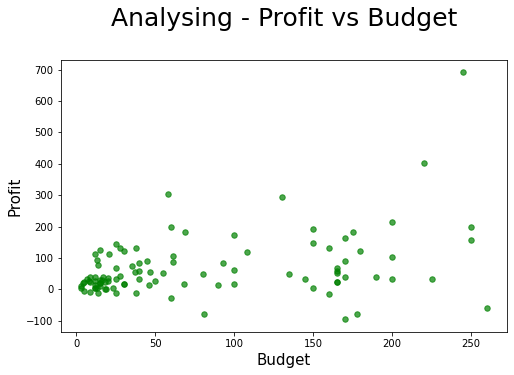

In [16]:
#Ploting profit vs budget

plt.figure(figsize=[8,5])

plt.scatter(movies.budget,movies.profit,alpha=0.7,c="Green",s=30)
plt.title("Analysing - Profit vs Budget\n",{"fontsize":25,"fontweight":7,"color":"black"})
plt.xlabel("Budget",{"fontsize":15,"fontweight":7,"color":"black"})
plt.ylabel("Profit",{"fontsize":15,"fontweight":7,"color":"black"})

plt.show()

## INFERENCES

1. So it is evident that even when the budget increases the profit is necessarily not increasing (so there is a very weak trend)
2. I can see a data point which seems to be outlier so have to check on the 1st movie for its validation
3. I can also find some movies are incuring loss even the budget is high 

In [17]:
#Finding the movies with negative profit

neg_profit = movies[movies.profit<0]
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


- ### The General Audience and the Critics    

In [18]:
# Changing the scale of MetaCritic

movies.MetaCritic = movies.MetaCritic.apply(lambda x : x/10)

movies.MetaCritic.head()

97    8.1
11    6.9
47    6.5
32    7.6
12    9.2
Name: MetaCritic, dtype: float64

In [19]:
# Finding the average ratings

movies["Avg_rating"] = (movies.IMDb_rating + movies.MetaCritic)/2

movies.Avg_rating.head()

97    8.10
11    7.50
47    7.25
32    7.60
12    8.75
Name: Avg_rating, dtype: float64

In [20]:
#Sorting in descending order of average rating

movies.sort_values("Avg_rating",ascending=False,inplace=True)

In [21]:
# Finding the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)

UniversalAcclaim = movies[(abs(movies.IMDb_rating - movies.MetaCritic)<0.5) & (movies.Avg_rating>=8)]

UniversalAcclaim

# SO there are 7 rows which satisfies the given condition

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
33,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00


- ### Finding the Most Popular Trios - I

In [22]:
# Write your code here
# creating a new dataframe with the required columns

pop_trio1 = movies[["actor_1_name","actor_2_name","actor_3_name","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"]]

pop_trio1=pop_trio1.groupby(by=["actor_1_name","actor_2_name","actor_3_name"]).sum()

pop_trio1.head()

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
actor_1_name,actor_2_name,actor_3_name,,,
Aidan Turner,Adam Brown,James Nesbitt,10000,1944.0,1546.0
Albert Finney,Helen McCrory,Rory Kinnear,883,563.0,393.0
Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor,559,427.0,303.0
Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0
Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0


In [23]:
# Creating a Variable which has the Total Facebook likes

pop_trio1["total_fb_likes"]=pop_trio1.actor_1_facebook_likes + pop_trio1.actor_2_facebook_likes + pop_trio1.actor_3_facebook_likes

pop_trio1.head()

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_fb_likes
actor_1_name,actor_2_name,actor_3_name,,,,
Aidan Turner,Adam Brown,James Nesbitt,10000,1944.0,1546.0,13490.0
Albert Finney,Helen McCrory,Rory Kinnear,883,563.0,393.0,1839.0
Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor,559,427.0,303.0,1289.0
Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0,40300.0
Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,2151.0


In [24]:
# Sorting according to the Maximum Facebook likes of the Trio-Actors combined

pop_trio1=pop_trio1.sort_values("total_fb_likes",ascending=False).head()

pop_trio1

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_fb_likes
actor_1_name,actor_2_name,actor_3_name,,,,
Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


In [25]:
# The List of names of the Trio-Actors for great business decisions

for i in range(5):
    print(list(pop_trio1.index[i]))

['Dev Patel', 'Nicole Kidman', 'Rooney Mara']
['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']
['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman']
['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler']
['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']


- ### Finding the Most Popular Trios - II

In [26]:
# For taking great business decisions.

for i in range(5):
    if pop_trio1.iloc[i,0] >= pop_trio1.iloc[i,1]/2 and pop_trio1.iloc[i,0] >= pop_trio1.iloc[i,2]/2:
        if pop_trio1.iloc[i,1] >= pop_trio1.iloc[i,0]/2 and pop_trio1.iloc[i,1] >= pop_trio1.iloc[i,2]/2:
            if pop_trio1.iloc[i,2] >= pop_trio1.iloc[i,0]/2 and pop_trio1.iloc[i,2] >= pop_trio1.iloc[i,1]/2:
                print(list(pop_trio1.index[i]))
    else:
        continue

['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']
['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman']
['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']


- ### Runtime Analysis

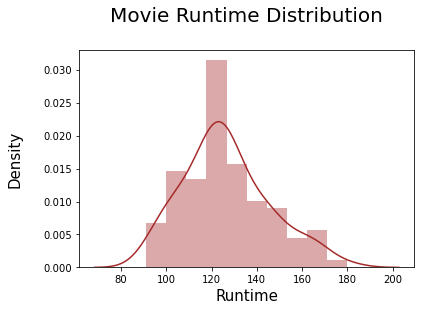

In [27]:
# Runtime histogram/density plot

# As explicitly asked for seaborn histogram iam ploting with distplot which gives the  probability density\
# as its Y axis values.

sns.distplot(movies.Runtime,color="Brown")
plt.title("Movie Runtime Distribution\n",{"fontsize":20,"fontweight":7})
plt.xlabel("Runtime\n",{"fontsize":15,"fontweight":5})
plt.ylabel("Density\n",{"fontsize":15,"fontweight":5})

plt.show()

- ### R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group.

In [28]:
PopularR = movies[movies.content_rating == "R"].sort_values("CVotesU18",ascending=False).head(10)

PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.8,7.9,7.7,8.1,8.0,R,USA,34.073773,8.45
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.2,7.3,7.0,7.1,7.9,7.7,R,USA,24.335698,8.30


## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters we made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres.

-  ### Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`, aggregating a few values over these 3 columns. 
1. First creating a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns are being extracted in total.
2. Now, Adding a column called `cnt` to the dataframe `df_by_genre` and initialize it to one.
3. Grouping the dataframe `df_by_genre` by `genre_1` and finding the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Performing the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that we have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, we are adding the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, taking the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, rounding off all the Votes related columns upto two digits after the decimal point.


In [29]:
# Create the dataframe df_by_genre

# As It is easy to select by range which involves many columns iam using label based selection

df_by_genre = movies.loc[:,"genre_1":"VotesnUS"]

# As only these Two columns were in between in the range of columns that I selected, Iam Now dropping it, so that\
# only the necessary columns are there for further analysis

df_by_genre.drop(columns=["MetaCritic","Runtime"],inplace=True)

df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
94,Drama,NaN,NaN,49673,62055,76838,52238,23789,10431,4906,...,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9
69,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0
18,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [30]:
# Creating a column cnt and initialize it to 1

df_by_genre["cnt"] =1

df_by_genre.cnt.head()

94    1
69    1
18    1
12    1
4     1
Name: cnt, dtype: int64

In [31]:
# Grouping the movies by individual genres

# grouping with Genre 1
df_by_g1=df_by_genre.groupby(by=["genre_1"]).sum()

# grouping with Genre 2 
df_by_g2=df_by_genre.groupby("genre_2").sum()

# grouping with Genre 3
df_by_g3=df_by_genre.groupby(by=["genre_3"]).sum()

In [32]:
# Adding the grouped data frames and storing it in a new data frame

df_add=df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)

df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [33]:
# Extracting genres with atleast 10 occurences

genre_top10 = df_add[df_add.cnt>=10]

genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [34]:
# Takeing the mean for every column by dividing with cnt 

# Iam using another variable as if we divide all columns then the "cnt" columns gets all the values to 1
genre_top11 = genre_top10.iloc[:,:-1].apply(lambda x : x/genre_top10.cnt)

# As this dataframe wont have "cnt" Column we are adding that column
genre_top11["cnt"] = genre_top10["cnt"]

# Reassigning the same to the variable name as mentioned in the question
genre_top10 = genre_top11.copy()

In [35]:
# Checking whether the above operation worked correctly

genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0


In [36]:
# Rounding off the columns of Votes to two decimals

genre_top10 = genre_top10.round(decimals=2)

In [37]:
# Converting CVotes to int type

for i in genre_top10.dtypes.index:
    if i.startswith("CVotes"):
        genre_top10[i] = genre_top10[i].astype(int)

In [38]:
# Just to check all the CVotes columns have changed to int datatype

genre_top10.dtypes

CVotes10          int32
CVotes09          int32
CVotes08          int32
CVotes07          int32
CVotes06          int32
CVotes05          int32
CVotes04          int32
CVotes03          int32
CVotes02          int32
CVotes01          int32
CVotesMale        int32
CVotesFemale      int32
CVotesU18         int32
CVotesU18M        int32
CVotesU18F        int32
CVotes1829        int32
CVotes1829M       int32
CVotes1829F       int32
CVotes3044        int32
CVotes3044M       int32
CVotes3044F       int32
CVotes45A         int32
CVotes45AM        int32
CVotes45AF        int32
CVotes1000        int32
CVotesUS          int32
CVotesnUS         int32
VotesM          float64
VotesF          float64
VotesU18        float64
VotesU18M       float64
VotesU18F       float64
Votes1829       float64
Votes1829M      float64
Votes1829F      float64
Votes3044       float64
Votes3044M      float64
Votes3044F      float64
Votes45A        float64
Votes45AM       float64
Votes45AF       float64
Votes1000       

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

In [39]:
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


-  ### Genre Counts

Now let's derive some insights from this data frame. Making a bar chart plotting different genres vs cnt using seaborn.

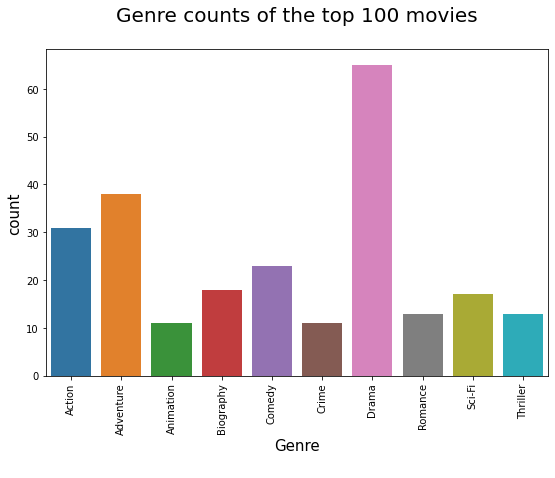

In [40]:
# Countplot for genres

plt.figure(figsize=[9,6])

sns.barplot(data=genre_top10,x=genre_top10.index,y="cnt") # used seaborn as mentioned

plt.title("Genre counts of the top 100 movies\n",{"fontsize":20,"fontweight":5})
plt.xlabel("Genre\n",{"fontsize":15,"fontweight":5})
plt.ylabel("count",{"fontsize":15,"fontweight":5})
plt.xticks(rotation = 90)
                    
plt.show()

-  ### Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Making heatmap to see how the average number of votes of males is varying across the genres.

2. Makeing heatmap to see how the average number of votes of females is varying across the genres.

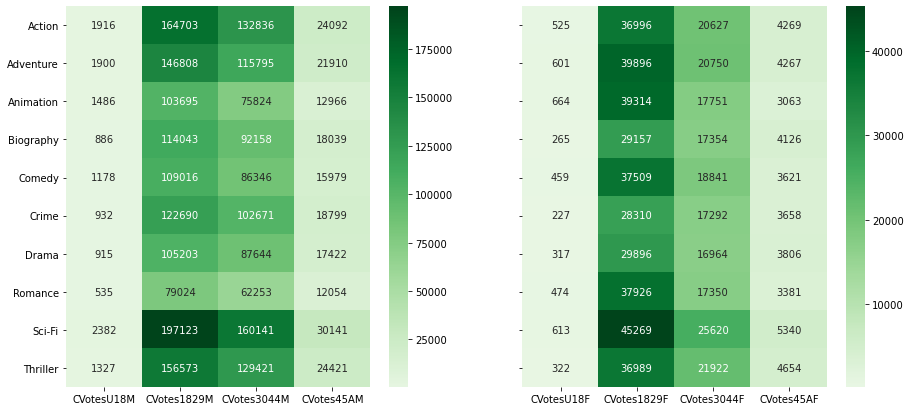

In [41]:
# 1st set of heat maps for CVotes-related columns

heat1=genre_top10[["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"]]
heat2=genre_top10[["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"]]


fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=[15,7])

sns.heatmap(heat1,cmap="Greens",fmt="g",annot=True,center=85000,ax=ax1)

sns.heatmap(heat2,cmap="Greens",fmt="g",annot=True,center=20000,ax=ax2)

plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: irrespective of their genders the rating is very high for the age bucket 18-44 than the other age groups (under 18 and above45) It can roughly say that people from the age bucket 18-44 are more actively giving their feedback for the movies they see.

- **Inference 2**: apparently we know male voters are high than the females, The distribution of number of votes is very high for the males when compared to females ( it is apparent by seeing the cbar values of the heatmap) which gives us an idea that males are giving more feedback than females and may be more males watch movies than females
- **Inference 3**: Top 3 Genres for which earned more number of ratings across both the genders are Sci-Fi, Action, Thriller. It only implies that they received more number of Ratings It may be Good or It may be Bad. 

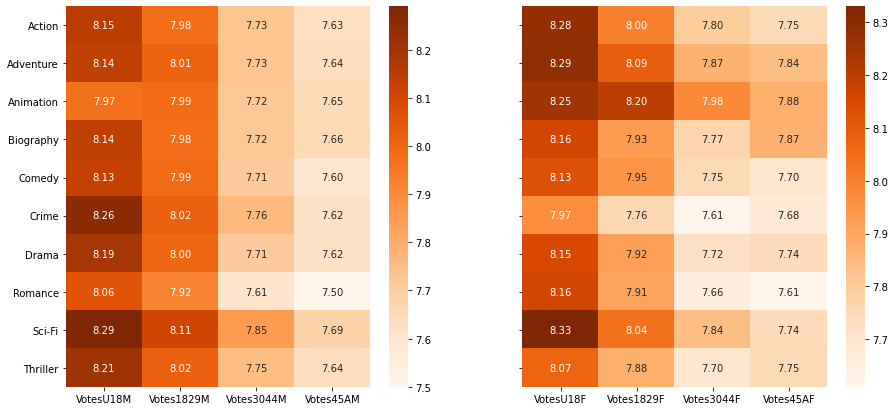

In [42]:
# 2nd set of heat maps for Votes-related columns
heat3=genre_top10[["VotesU18M","Votes1829M","Votes3044M","Votes45AM"]]
heat4=genre_top10[["VotesU18F","Votes1829F","Votes3044F","Votes45AF"]]

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=[15,7])

sns.heatmap(heat3,cmap="Oranges",fmt="0.2f",ax=ax1,annot=True)

sns.heatmap(heat4,cmap="Oranges",fmt="0.2f",ax=ax2,annot=True)

plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: Even though the numbers of voters were less in the age bucket Under18 ( with referencing the CVotes heatmap) It seems that this age group has given the top rating among all the other age groups and irrespective of their Genders. It is a significant break through that kids are giving the top rating across all the genres than the other age group.

- **Inference 2**: In males I see a trend that as the age group increases the Ratings decreases among all the genres. Even female age group's Rating also follows the same trend as observed in males age group except for the genres of Sci-Fi, Animation & Adventure.
- **Inference 3**: Except in the genre "Crime" The female Kids (U18) have given high rating than the Male kids (U18), The point here to note is the Female kid voters (under 18) have the least number of voters than all other age group on both genders ( referencing the "CVotes" heatmap). 

-  ### US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Creating a column `IFUS` in the dataframe `movies`. The column `IFUS` will contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` will contain the value `non-USA`.


2. making a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies.

In [43]:
# Creating IFUS column

movies["IFUS"]=movies.Country.apply(lambda x : "USA" if x=="USA" else "non-USA")

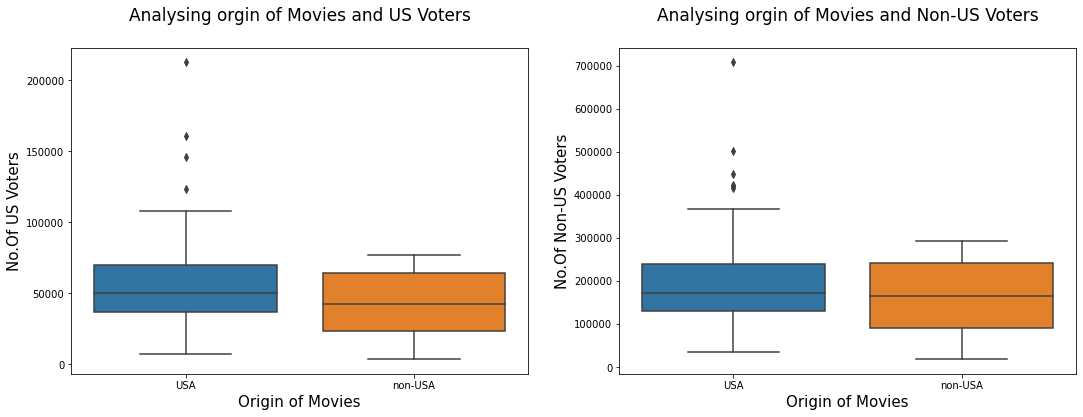

In [44]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sns.boxplot(data=movies,x="IFUS",y="CVotesUS") # used seaborn as mentioned in the question
plt.xlabel("Origin of Movies",{"fontsize":15,"fontweight":5})
plt.ylabel("No.Of US Voters",{"fontsize":15,"fontweight":5})
plt.title("Analysing orgin of Movies and US Voters\n",{"fontsize":17,"fontweight":5})

plt.subplot(1,2,2)
sns.boxplot(data=movies,x="IFUS",y="CVotesnUS") # used seaborn as mentioned in the question
plt.xlabel("Origin of Movies",{"fontsize":15,"fontweight":5})
plt.ylabel("No.Of Non-US Voters",{"fontsize":15,"fontweight":5})
plt.title("Analysing orgin of Movies and Non-US Voters\n",{"fontsize":17,"fontweight":5})

plt.show()

- **Inference 1**: wherever the origin of the movies might be it shares **almost** the same minimum and median values for the number of Voters from the USA. But the movies with its origin from USA tends to have a huge range of Number of US voters (evident from min & max fence) 
- **Inference 2**: **(except people from USA)** There are more number of voters across the **globe** for the movies which has its origin as USA. Interestingly movies from both USA and outside USA has almost equal number of voters till the 75th percentile 

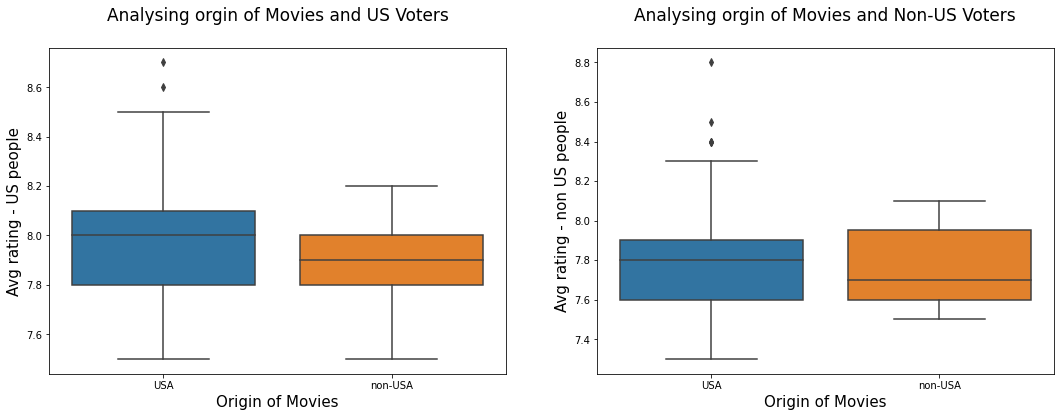

In [45]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sns.boxplot(data=movies,x="IFUS",y="VotesUS") # used Seaborn as mentioned in the question
plt.xlabel("Origin of Movies",{"fontsize":15,"fontweight":5})
plt.ylabel("Avg rating - US people",{"fontsize":15,"fontweight":5})
plt.title("Analysing orgin of Movies and US Voters\n",{"fontsize":17,"fontweight":5})

plt.subplot(1,2,2)
sns.boxplot(data=movies,x="IFUS",y="VotesnUS") # used Seaborn as mentioned in the question
plt.xlabel("Origin of Movies",{"fontsize":15,"fontweight":5})
plt.ylabel("Avg rating - non US people",{"fontsize":15,"fontweight":5})
plt.title("Analysing orgin of Movies and Non-US Voters\n",{"fontsize":17,"fontweight":5})

plt.show()

- **Inference 1**: Suprisingly global **(including USA and Non-USA people)** average rating for movies which originates outside USA has never crossed the 8.25 rating cap.
- **Inference 2**: Suprisingly the average rating of the non-US people for the Non-USA movies has never gone below 7.5, which infers us movies outside USA maintains a standard range, although it doesn't have as high ratings as the moives from USA,it also doesn't have as low ratings as the movies from USA.

-  ### Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sorting the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

In [46]:
# Sorting by CVotes1000

genre_top10=genre_top10.sort_values("CVotes1000",ascending=False)

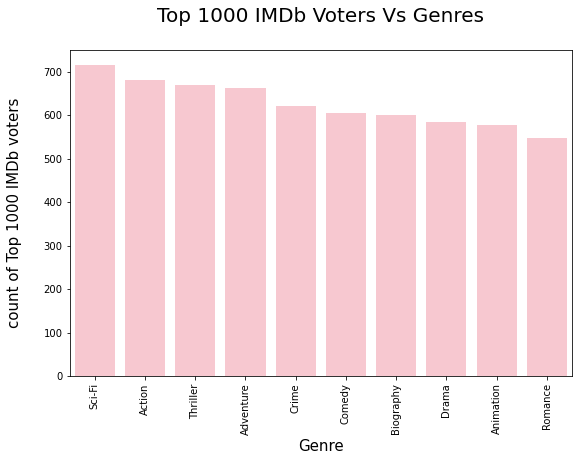

In [47]:
# Bar plot
plt.figure(figsize=[9,6])
sns.barplot(data=genre_top10,x=genre_top10.index,y="CVotes1000",color="pink") # used Seaborn as mentioned in the question


plt.xlabel("Genre",{"fontsize":15,"fontweight":5})
plt.ylabel("count of Top 1000 IMDb voters\n",{"fontsize":15,"fontweight":5})
plt.xticks(rotation=90)
plt.title("Top 1000 IMDb Voters Vs Genres\n",{"fontsize":20,"fontweight":5})
plt.xticks(rotation=90)

plt.show()

**`Inferences:`** Even in the Top 1000 IMDb voters the Sci-fi genre received more number of votes and topped the list ( it also toped the list in the more number of Ratings received for the genres and higest rating received for the genres, evident by the heat maps).
And a point to note here is the difference between the highest number of voters and lowest number of voters for all the genres is only around 150 people.